## Representaciones Espaciales - Parte 1
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/fundamentos-robotica-python/blob/main/3-Representaciones-Espaciales/1-representaciones-espaciales-I.ipynb)

Oscar E. Ramos Ponce, Universidad de Ingeniería y Tecnología - UTEC
Fundamentos de Robótica

Este archivo contiene algunos ejemplos de las diapositivas del curso

In [1]:
import numpy as np

### Diapositiva 20: Ejemplo 1

In [2]:
# Parte a) Rotación del sistema B respecto del sistema A

R = np.array([[np.cos(np.pi/2),   np.cos(np.pi), np.cos(np.pi/2)],
              [      np.cos(0), np.cos(np.pi/2), np.cos(np.pi/2)],
              [np.cos(np.pi/2), np.cos(np.pi/2),       np.cos(0)]])

print(R)  # No muestra 1 ni 0 debido a aproximaciones del coseno 

[[ 6.123234e-17 -1.000000e+00  6.123234e-17]
 [ 1.000000e+00  6.123234e-17  6.123234e-17]
 [ 6.123234e-17  6.123234e-17  1.000000e+00]]


In [3]:
print(np.round(R,3))     # Se sugiere redondear

[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]]


In [4]:
# Parte b) Rotación del sistema A respecto del sistema B 
# Por facilidad se puede crear un 'alias' para el coseno y pi de NumPy
cos = np.cos
pi = np.pi

R = np.array([[cos(pi/2),    cos(0), cos(pi/2)],
              [  cos(pi), cos(pi/2), cos(pi/2)],
              [cos(pi/2), cos(pi/2),    cos(0)]])
print(np.round(R,3))

[[ 0.  1.  0.]
 [-1.  0.  0.]
 [ 0.  0.  1.]]


### Diapositiva 21: Ejemplo 2

Para utilizar elementos simbólicos se utilizará la biblioteca `sympy` de Python

In [5]:
import sympy as sp

In [6]:
# Definición de variables simbólicas
t = sp.symbols("t")

# Matriz de rotación alrededor de z
R = sp.Matrix([[        sp.cos(t),  sp.cos(sp.pi/2+t),  sp.cos(sp.pi/2)],
               [sp.cos(sp.pi/2-t),          sp.cos(t),  sp.cos(sp.pi/2)],
               [  sp.cos(sp.pi/2),    sp.cos(sp.pi/2),        sp.cos(0)]])
R

Matrix([
[cos(t), -sin(t), 0],
[sin(t),  cos(t), 0],
[     0,       0, 1]])

**NOTA**: EL `cos` DE SYMPY ES DIFERENTE AL `cos` DE NUMPY. IGUALMENTE `sin` y `pi`. Se debe tener cuidado con no mezclar numpy con sympy, especialmente cuando se utiliza "alias" para las funciones de numpy.

### Diapositiva 21: Ejemplo 3

Para realizar gráficos se utilizará la biblioteca `matplotlib` de Python

In [7]:
import matplotlib.pyplot as plt

* Si se utiliza Google Colab se debe descomentar la siguiente línea que instala `ipympl` usando pip.

In [8]:
# !pip install ipympl --quiet

* Si se utiliza Google Colab se debe descomentar las siguientes dos líneas, que permiten la ejecución de widgets externos (a colab)

In [9]:
# from google.colab import output
# output.enable_custom_widget_manager()

La siguiente línea permite graficar y visualizar de manera interactiva. Se sugiere las siguientes configuraciones
* Si se utiliza Jupyter notebook de Anaconda: `%matplotlib notebook`
* Si se utiliza VSCode o Google Colab: `%matplotlib widget`

Notar que al escoger una opción, ya no es posible modificarla más adelante. Para cambiar de opción es necesario reiniciar el kernel de Python.

In [10]:
%matplotlib widget

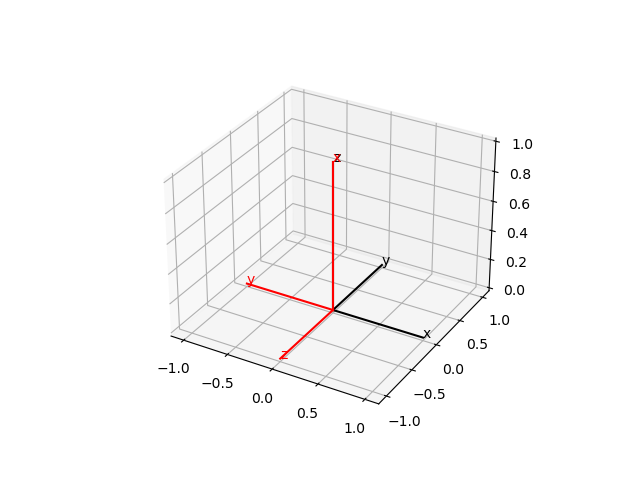

In [11]:
ax = plt.axes(projection='3d')

# Ejes canónicos
ax.plot([0,1],[0,0],[0,0], color='k')
ax.plot([0,0],[0,1],[0,0], color='k')
ax.plot([0,0],[0,0],[0,1], color='k')
# Nombres de los ejes
ax.text(1, 0, 0, 'x', color='k')
ax.text(0, 1, 0, 'y', color='k')
ax.text(0, 0, 1, 'z', color='k')

# Matriz de rotación
R = np.array([[0, -1,  0], 
              [0,  0, -1], 
              [1,  0, 0]])

# Ejes solicitados
ax.plot([0,R[0,0]], [0,R[1,0]], [0,R[2,0]], color='r')
ax.plot([0,R[0,1]], [0,R[1,1]], [0,R[2,1]], color='r')
ax.plot([0,R[0,2]], [0,R[1,2]], [0,R[2,2]], color='r')

# Nombres de los nuevos ejes
ax.text(R[0,0], R[1,0], R[2,0], 'x', color='r')
ax.text(R[0,1], R[1,1], R[2,1], 'y', color='r')
ax.text(R[0,2], R[1,2], R[2,2], 'z', color='r')

plt.show()

### Diapositiva 25: Transpuesta de una Matriz de Rotación (diapositiva 25)

In [12]:
# Variables simbólicas que serán los componentes de los ejes
x1,x2,x3,y1,y2,y3,z1,z2,z3 = sp.symbols("x1 x2 x3 y1 y2 y3 z1 z2 z3")

# Matriz de rotación con ejes x=(x1,x2,x3), y=(y1,y2,y3), z=(z1,z2,z3)
R = sp.Matrix([[x1, y1, z1],
               [x2, y2, z2],
               [x3, y3, z3]])

R

Matrix([
[x1, y1, z1],
[x2, y2, z2],
[x3, y3, z3]])

In [13]:
# Producto de la transpuesta de R con R
R.T * R

Matrix([
[x1**2 + x2**2 + x3**2, x1*y1 + x2*y2 + x3*y3, x1*z1 + x2*z2 + x3*z3],
[x1*y1 + x2*y2 + x3*y3, y1**2 + y2**2 + y3**2, y1*z1 + y2*z2 + y3*z3],
[x1*z1 + x2*z2 + x3*z3, y1*z1 + y2*z2 + y3*z3, z1**2 + z2**2 + z3**2]])

La expresión anterior es la identidad, considerando que los ejes son unitarios y perpendiculares entre sí

In [14]:
# Producto de R con su transpuesta
R*R.T

Matrix([
[x1**2 + y1**2 + z1**2, x1*x2 + y1*y2 + z1*z2, x1*x3 + y1*y3 + z1*z3],
[x1*x2 + y1*y2 + z1*z2, x2**2 + y2**2 + z2**2, x2*x3 + y2*y3 + z2*z3],
[x1*x3 + y1*y3 + z1*z3, x2*x3 + y2*y3 + z2*z3, x3**2 + y3**2 + z3**2]])

### Diapositiva 27: Determinante de una Matriz de Rotación (diapositiva 27)

In [15]:
# Matriz de rotación con ejes x=(x1,x2,x3), y=(y1,y2,y3), z=(z1,z2,z3)
R = sp.Matrix([[x1, y1, z1],
               [x2, y2, z2],
               [x3, y3, z3]])
R

Matrix([
[x1, y1, z1],
[x2, y2, z2],
[x3, y3, z3]])

In [16]:
# Determinante
detR = R.det()
detR

x1*y2*z3 - x1*y3*z2 - x2*y1*z3 + x2*y3*z1 + x3*y1*z2 - x3*y2*z1

In [17]:
# Factorizando elementos del determinante
sp.collect(detR, ('x1', 'x2', 'x3'))

x1*(y2*z3 - y3*z2) + x2*(-y1*z3 + y3*z1) + x3*(y1*z2 - y2*z1)

In [18]:
# Producto cruz de y con z (debe ser igual a x)
y = sp.Matrix([y1, y2, y3])
z = sp.Matrix([z1, z2, z3])
y.cross(z)

Matrix([
[ y2*z3 - y3*z2],
[-y1*z3 + y3*z1],
[ y1*z2 - y2*z1]])

### Diapositiva 29: Ejemplo 1 (propiedades matriz de rotación)

In [19]:
# a)
R = np.array([[         -1/2,  0, -np.sqrt(3)/2],
              [            0,  1,             0],
              [-np.sqrt(3)/2,  0,           1/2]])

detR = np.linalg.det(R)
np.round(detR, 3)

-1.0

In [20]:
# b)
R = np.array([[         -1/2,  0, -np.sqrt(3)/2],
              [            0,  1,             0],
              [ np.sqrt(3)/2,  0,          -1/2]])

# Condición 1
detR = np.linalg.det(R)
np.round(detR, 3)

1.0

In [21]:
# Condición 2
R.dot(R.T)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
# Esta verificación no es necesaria ya que si se cumple la anterior, también se cumplirá
R.T.dot(R)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Diapositiva 30: Ejemplo 2 (propiedades de una matriz de rotación)

In [23]:
R = np.array([[  0.25,  0.433,  0.866],
              [ 0.866,   -0.5,    0  ],
              [ 0.433,   0.75,  -0.5 ]])
R

array([[ 0.25 ,  0.433,  0.866],
       [ 0.866, -0.5  ,  0.   ],
       [ 0.433,  0.75 , -0.5  ]])

In [24]:
# a) Transpuesta
R.T

array([[ 0.25 ,  0.866,  0.433],
       [ 0.433, -0.5  ,  0.75 ],
       [ 0.866,  0.   , -0.5  ]])

In [25]:
# b) Verificación
detR = np.linalg.det(R)
print(detR)

0.999945


In [26]:
np.round( R.dot(R.T), 3)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [27]:
# c) Inversa
invR = np.linalg.inv(R)
np.round(invR, 3)

array([[ 0.25 ,  0.866,  0.433],
       [ 0.433, -0.5  ,  0.75 ],
       [ 0.866, -0.   , -0.5  ]])

### Diapositiva 35: Ejemplo (mapeo entre sistemas de referencia)

In [28]:
# a)
d1, d2 = sp.symbols("d1 d2")
Pb = sp.Matrix([d2, d1, 0])
Pb

Matrix([
[d2],
[d1],
[ 0]])

In [29]:
# b)
Rab = sp.Matrix([[0, -1,  0],
                 [1,  0,  0],
                 [0,  0,  1]])

Pa = Rab*Pb
Pa

Matrix([
[-d1],
[ d2],
[  0]])

### Diapositiva 36: Ejemplo (Operador de rotación)

In [30]:
# Usando numpy (cálculos numéricos)

p1 = np.array([0, np.sqrt(3), 1])
R = np.array([[1, 0, 0],
              [0, np.cos(np.deg2rad(30)), -np.sin(np.deg2rad(30))],
              [0, np.sin(np.deg2rad(30)),  np.cos(np.deg2rad(30))]])

p2 = R.dot(p1)
p2

array([0.        , 1.        , 1.73205081])

In [31]:
# Usando sympy (cálculos simbólicos)

p1 = sp.Matrix([0, sp.sqrt(3), 1])
R = sp.Matrix([[1, 0, 0],
               [0, sp.cos(sp.pi/6), -sp.sin(sp.pi/6)],
               [0, sp.sin(sp.pi/6),  sp.cos(sp.pi/6)]])

p2 = R * p1
p2

Matrix([
[      0],
[      1],
[sqrt(3)]])